<div style="background-color:maroon;width:100%;color:white;font-size:20px;padding-top:20px;padding-bottom:20px;padding-left:15px;font-weight:bold"><p>OVERVIEW TASK 1: Project Based Learning (PBL)</p></div>


Machine Learning is on of the technique of artificial intelligence that is widely use in many field such as healthcare , agriculture, linguistic and so on. The context of this problem-based learning course is to provide to the students in MSc the basic knowledge about Natural Language Processing through a pratical example. 

<strong>OBJECTIVE OF THE PROJECT</strong>
<hr style=`backgound-color:black;height:2px`>
<ol>
    <li>Data Exploration Methods</li>
    <li>Data Cleanning Process</li>
    <li>Text Embeddings Method</li> 
    <li>Text Data Classification </li>
</ol>

<strong>ABOUT THE DATASET</strong>
<hr style=`backgound-color:black;height:2px`>

For this pratical courses we will use customers support on twitter available on Kaggle. The datasets contains more than 1 million tweets including customers questions and the answers from the compaies. The dataset has 7 features describes as follow:
<ul>
    <li><strong>tweet_id:</strong> tweet_id is an unique identifier for each tweet in the dataset</li>
    <li><strong>author_id:</strong>author_id is an unique identifier for each users in the dataset</li>
    <li><strong>inbounded:</strong> inbounded is a boolean value which can be true or false if<br/> the tweet is a company answer or not.</li>
    <li><strong>created_at:</strong> This date correspond to the date where the tweet posted <br/>by the users.</li>
    <li><strong>text:</strong> text correspond to the customers inquiries or the companies answers</li>
    <li><strong>response_tweet_id:</strong> IDs of tweets that are responses to this tweet, <br/>comma-separated.</li>
    <li><strong>in_response_to_tweet_id:</strong> ID of the tweet this tweet is in response to, if<br/> any</li>
    
</ul>

In additionnal the dataset has several languages such as english, french, and so on. 

<strong style="color:maroon">HYPOTHESIS</strong>
<hr style=`backgound-color:black;height:2px`>

<p style="justify-content: center;padding:5px">In this analysis we intend to build a classifier on the top of the datset of customer support on Twitter. Let's see how we can train classifier to classify the customer per companies based on their tweets. For the simplicity, let consider the following companies: Apple, Amazon, PlayStation, XboxSupport, TMobile and Uber_Support. </p>

<strong>SOME CONCEPTS AND DEFINITION</strong>
<hr style=`backgound-color:black;height:2px`>

<ol>
    <li>Natural Language Processing:</li>
    <li>Supervised Machine Learning:</li>
    <li>Tokenization:</li>
    <li>Classification:</li>
    <li>Words or Document Embedding:</li>
    
</ol>

<strong>BASIC PYTHON PROGRAMMING</strong>
<hr style=`backgound-color:black;height:2px`>

This part of the module is to present briefly some libraries we used in this to students. In case the students are confortable with these libraries, they can just skip this part.

<strong style="color:maroon">SOME LIBRARIES WE USE IN THIS COURSE</strong>
<hr style=`backgound-color:black;height:2px`>

<ol>
    <li><strong>Pandas:</strong></li>
    <li><strong>Gensim:</strong></li>
    <li><strong>Matplolib:</strong></li>
    <li><strong>Tensorflow:<strong></li>
    <li><strong>Keras:</strong></li>
    
</ol>

<strong>SOLUTION TO THE HYPOTHESIS</strong>
<hr style=`backgound-color:black;height:2px`>

## HYPOTHESIS 1

In [1]:
import pandas as pd 
from string import ascii_letters, punctuation
pd.options.mode.chained_assignment = None
import numpy as np 
from copy import deepcopy
import re
import string
import seaborn as sb
from string import punctuation
from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas(desc="progress-cleanning")
from sklearn.preprocessing import scale
import gensim
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
import warnings
warnings.filterwarnings('ignore')

#### LOADING THE DATASET IN A DATAFRAME

In [2]:
def ingest(path):
    data = pd.read_csv(path)
    
    data = data[data.text.isnull() == False]
    data = data[data['text'].isnull() == False]
    data.reset_index(inplace=True)
    data.drop('index', axis=1, inplace=True)
    print('dataset loaded with shape', data.shape)    
    return data

data = ingest('twcs.csv')

dataset loaded with shape (2811774, 7)


In [3]:
# Pick only inbound tweets that aren't in reply to anything...
first_inbound = data[pd.isnull(data.in_response_to_tweet_id) & data.inbound]
print('Found {} first inbound messages.'.format(len(first_inbound)))

# Merge in all tweets in response
inbounds_and_outbounds = pd.merge(first_inbound, data, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')
print("Found {} responses.".format(len(inbounds_and_outbounds)))

# Filter out cases where reply tweet isn't from company
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

print("Found {} responses from companies.".format(len(inbounds_and_outbounds)))


Found 787346 first inbound messages.
Found 875292 responses.
Found 794299 responses from companies.


In [4]:
df=inbounds_and_outbounds

In [5]:
df=df.drop_duplicates(['tweet_id_x'], keep='first')

In [6]:
array=['AppleSupport','AmazonHelp','AskPlayStation','XboxSupport','TMobileHelp','Uber_Support' ]

df.loc[df['author_id_y'].isin(array)]
df=df.loc[df['author_id_y'].isin(array)]

In [7]:
df['category_id'] = df['author_id_y'].factorize()[0]
from io import StringIO
category_id_df = df[['author_id_y', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'author_id_y']].values)

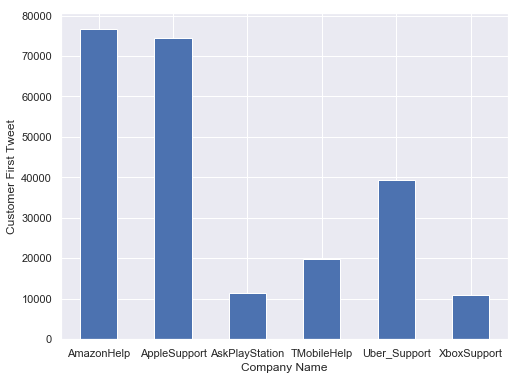

In [8]:
sb.set()
fig = plt.figure(figsize=(8,6))
ax=df.groupby('author_id_y').text_x.count().plot.bar(rot=0)
ax.set_xlabel("Company Name")
ax.set_ylabel("Customer First Tweet")
plt.savefig('chart.jpg', bbox_inches = "tight")
plt.show()

In [9]:
df.groupby('author_id_y').text_x.count().min()

10817

In [10]:
def sampling_k_elements(group, k=10817):
    if len(group) < k:
        return group
    return group.sample(k)

balanced = df.groupby('author_id_y').apply(sampling_k_elements).reset_index(drop=True)

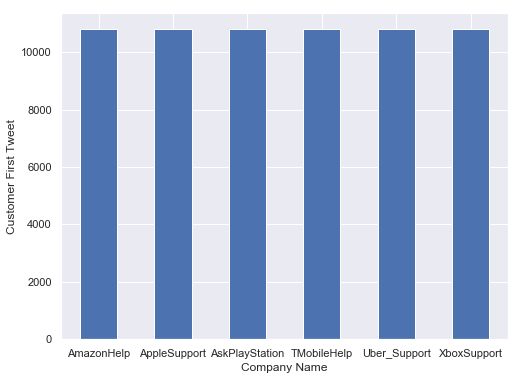

In [11]:
fig = plt.figure(figsize=(8,6))
ax=balanced.groupby('author_id_y').text_x.count().plot.bar(rot=0)
ax.set_xlabel("Company Name")
ax.set_ylabel("Customer First Tweet")
plt.savefig('balancechart.jpg', bbox_inches = "tight")
plt.show()

In [12]:
balanced[['created_at_x','created_at_y']].head(2)

,created_at_x,created_at_y
0,Mon Nov 27 09:48:54 +0000 2017,Mon Nov 27 10:03:27 +0000 2017
1,Sat Oct 28 23:08:30 +0000 2017,Sat Oct 28 23:15:00 +0000 2017


In [13]:
balanced['time_created_at_x']=pd.to_datetime(balanced["created_at_x"], format="%a %b %d %H:%M:%S +0000 %Y")

In [14]:
balanced['time_created_at_y']=pd.to_datetime(balanced["created_at_y"], format="%a %b %d %H:%M:%S +0000 %Y")

In [15]:
balanced[['created_at_x','time_created_at_x']].head(2)

,created_at_x,time_created_at_x
0,Mon Nov 27 09:48:54 +0000 2017,2017-11-27 09:48:54
1,Sat Oct 28 23:08:30 +0000 2017,2017-10-28 23:08:30


In [16]:
time=balanced['time_created_at_y']-balanced['time_created_at_x']
balanced['response_time']=time.dt.total_seconds()
balanced['response_time'].head(2)

0    873.0
1    390.0
Name: response_time, dtype: float64

In [17]:
balanced['response_time'].mean()

10748.330775630951

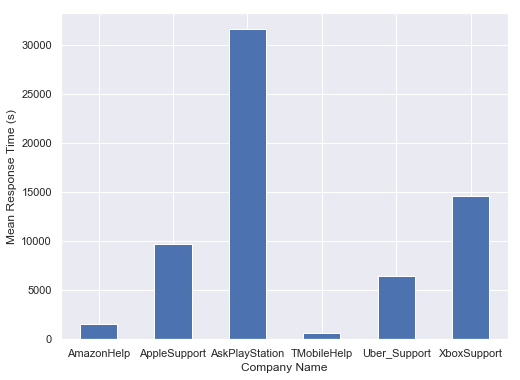

In [18]:
fig = plt.figure(figsize=(8,6))
ax=balanced.groupby('author_id_y').response_time.mean().plot.bar(rot=0)
ax.set_xlabel("Company Name")
ax.set_ylabel("Mean Response Time (s)")
plt.savefig('response.jpg', bbox_inches = "tight")
plt.show()

## HYPOTHESIS 2

In [19]:
balanced.columns

Index(['tweet_id_x', 'author_id_x', 'inbound_x', 'created_at_x', 'text_x',
       'response_tweet_id_x', 'in_response_to_tweet_id_x', 'tweet_id_y',
       'author_id_y', 'inbound_y', 'created_at_y', 'text_y',
       'response_tweet_id_y', 'in_response_to_tweet_id_y', 'category_id',
       'time_created_at_x', 'time_created_at_y', 'response_time'],
      dtype='object')

In [20]:
balanced[["text_x","response_time"]].head(1)

,text_x,response_time
0,@AmazonHelp wenn ich AmazonPrime abschließe um...,873.0


#### SPECIAL CHARACTERS & LANGUAGE FILTERING

In [21]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

In [22]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed in the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

In [23]:
from langdetect import detect
stop_words=[]
def tokenize(tweet):
    try:
        if detect(tweet)=="en":
                tweet=clean_text_round1(tweet)
                tweet=clean_text_round2(tweet)
                
                #creating tokens for each tweet
                tokens = tokenizer.tokenize(tweet.lower())
                #Removing te stop words from the tweet
                tokens=[w for w in tokens if not w in stop_words]
                #Removing the htag of the company
                others_word_to_remove=['applesupport','tmobilehelp','ubersupport','xboxsupport','amazonhelp','askplaystation']
                tokens=[w for w in tokens if not w in others_word_to_remove]
                #Removing special characters such as kanjis from the tokens
                allowed = set(ascii_letters)
                tokens=[word for word in tokens if any(letter in allowed for letter in word)]

                try:
                    #We used this filter function to remove all tokens starting with these charaters 
                    #in order to delete information such as URL username ,link and htags
                    tokens = list(filter(lambda t: not t.startswith('@'), tokens))
                    tokens = list(filter(lambda t: not t.startswith('#'), tokens))
                    tokens = list(filter(lambda t: not t.startswith('http'), tokens))
                    tokens = list(filter(lambda t: not t.startswith('www'), tokens))
                    # Since the tokens contain a list of word for each tweet, we reconstruct the tweet by using the function join
                    return " ".join(tokens)
                except:
                    return 'NC'
    except:
        pass

In [24]:
balanced.shape

(64902, 18)

In [25]:
def postprocess(data, n=64902):
    data = data.head(n)
    data['cleaned_tweet'] = data['text_x'].progress_map(tokenize)
    data = data[data.cleaned_tweet != 'NC']
    data.reset_index(inplace=True)
    
    return data
data_clean = postprocess(balanced)

progress-cleanning: 100%|███████████████████████████████████████████████████████| 64902/64902 [08:44<00:00, 123.76it/s]


In [26]:
data_to_save=data_clean[data_clean['cleaned_tweet'].isnull() == False]

In [27]:
pd.set_option('display.max_colwidth', -1)
data_to_save[["text_x","cleaned_tweet"]].head(1)

,text_x,cleaned_tweet
1,"Say, @115821 my tracking say my shit was delivered but I see no package👀",say my tracking say my shit was delivered but i see no package


In [28]:
data_to_save[["cleaned_tweet","response_time"]].head(1)

,cleaned_tweet,response_time
1,say my tracking say my shit was delivered but i see no package,390.0


### Let create de function the tweet annotation

Here we will use a library calles TextBlob which can be install through the following command: <strong>pip install textblob </strong>

In [29]:
from textblob import TextBlob
def annotator(tweet):
    blob=TextBlob(tweet)
    if blob.sentiment.polarity>0.5:
        return "positive"
    else:
        return "negative"

In [30]:
def annotationprocess(data, n=59761):
    data = data.head(n)
    data['category'] = data['cleaned_tweet'].progress_map(annotator)
    data.reset_index(inplace=True)
    return data
data_annotated = annotationprocess(data_to_save)

progress-cleanning: 100%|██████████████████████████████████████████████████████| 59693/59693 [00:20<00:00, 2916.12it/s]


In [31]:
data_annotated.columns

Index(['level_0', 'index', 'tweet_id_x', 'author_id_x', 'inbound_x',
       'created_at_x', 'text_x', 'response_tweet_id_x',
       'in_response_to_tweet_id_x', 'tweet_id_y', 'author_id_y', 'inbound_y',
       'created_at_y', 'text_y', 'response_tweet_id_y',
       'in_response_to_tweet_id_y', 'category_id', 'time_created_at_x',
       'time_created_at_y', 'response_time', 'cleaned_tweet', 'category'],
      dtype='object')

In [32]:
data_annotated[["cleaned_tweet","category", "response_time","author_id_y"]].head()

,cleaned_tweet,category,response_time,author_id_y
0,say my tracking say my shit was delivered but i see no package,negative,390.0,AmazonHelp
1,the amazon agent number is switched off amzagent please help,negative,1873.0,AmazonHelp
2,shout out to for being the worst company when it comes to dealing with fraud,negative,623.0,AmazonHelp
3,so much for service screw all your deliveries then proceed to be the rudest customer service explaining sometimes the drivers decide to not deliver sarcastically end the conversation and delete the chat beyond annoyed prime is so great now,negative,192.0,AmazonHelp
4,when amazon delivery crosses my home without stopping me arey bhai bhai bhai,negative,3267.0,AmazonHelp


Positive per Company / Negative per Company

In [33]:
group_company=data_annotated.groupby(['author_id_y','category'])["category"].count().reset_index(name="count")

In [34]:
group_company

,author_id_y,category,count
0,AmazonHelp,negative,7804
1,AmazonHelp,positive,217
2,AppleSupport,negative,10333
3,AppleSupport,positive,133
4,AskPlayStation,negative,9632
5,AskPlayStation,positive,127
6,TMobileHelp,negative,10123
7,TMobileHelp,positive,335
8,Uber_Support,negative,10438
9,Uber_Support,positive,168


In [35]:
positive_df=group_company.loc[group_company["category"]=="positive"]
negative_df=group_company.loc[group_company["category"]=="negative"]

In [36]:
positive_df

,author_id_y,category,count
1,AmazonHelp,positive,217
3,AppleSupport,positive,133
5,AskPlayStation,positive,127
7,TMobileHelp,positive,335
9,Uber_Support,positive,168
11,XboxSupport,positive,171


In [37]:
negative_df

,author_id_y,category,count
0,AmazonHelp,negative,7804
2,AppleSupport,negative,10333
4,AskPlayStation,negative,9632
6,TMobileHelp,negative,10123
8,Uber_Support,negative,10438
10,XboxSupport,negative,10212


In [38]:
positive=tuple(positive_df["count"].tolist())
negative=tuple(negative_df["count"].tolist())
company_name=tuple(positive_df["author_id_y"].tolist())

In [39]:
positive

(217, 133, 127, 335, 168, 171)

In [40]:
negative

(7804, 10333, 9632, 10123, 10438, 10212)

In [41]:
company_name

('AmazonHelp',
 'AppleSupport',
 'AskPlayStation',
 'TMobileHelp',
 'Uber_Support',
 'XboxSupport')

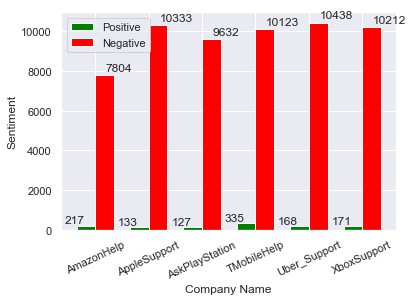

In [42]:
ind = np.arange(len(company_name))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, positive, width,color='Green', label='Positive')

rects2 = ax.bar(ind + width/2, negative, width, color='Red', label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment')
ax.set_xlabel('Company Name')

ax.set_xticks(ind)
ax.set_xticklabels(company_name)
ax.legend()


def autolabel(rects, xpos='center'):
    xpos = xpos.lower() 
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43} 

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")
plt.xticks(rotation=25)
plt.savefig('sentiment.jpg', bbox_inches = "tight")
plt.show()

# HPOTHSIS 3


Let create a function to assign the label <strong> bad </strong> if the response time is larger than the mean and <strong> good </strong> if it smaler than the mean.

In [43]:
data_annotated.shape

(59693, 22)

In [44]:
mean=data_annotated["response_time"].mean()
print(mean)

10768.232523076407


In [45]:
def behaviorannotator(response_time):
    if response_time<mean:
        return "good"
    else:
        return "bad"

In [46]:
def behaviorannotationprocess(datas, n=59761):
    datas = datas.head(n)
    datas['behavior'] = datas['response_time'].progress_map(behaviorannotator)
    return datas
d=behaviorannotationprocess(data_annotated)

progress-cleanning: 100%|████████████████████████████████████████████████████| 59693/59693 [00:00<00:00, 763893.23it/s]


In [47]:
d[["cleaned_tweet","response_time","behavior"]].head(2)

,cleaned_tweet,response_time,behavior
0,say my tracking say my shit was delivered but i see no package,390.0,good
1,the amazon agent number is switched off amzagent please help,1873.0,good


## Ranking the company per Bad or Good

In [48]:
group_company=d.groupby(['author_id_y','behavior'])["behavior"].count().reset_index(name="count")

In [49]:
good_df=group_company.loc[group_company["behavior"]=="good"]
bad_df=group_company.loc[group_company["behavior"]=="bad"]

In [50]:
good=tuple(good_df["count"].tolist())
bad=tuple(bad_df["count"].tolist())
company_name=tuple(good_df["author_id_y"].tolist())

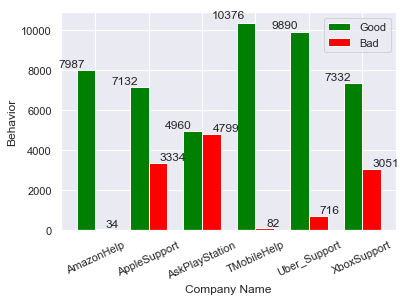

In [51]:
ind = np.arange(len(company_name))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, good, width,color='Green', label='Good')

rects2 = ax.bar(ind + width/2, bad, width, color='Red', label='Bad')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Behavior')
ax.set_xlabel('Company Name')

ax.set_xticks(ind)
ax.set_xticklabels(company_name)
ax.legend()


def autolabel(rects, xpos='center'):
    xpos = xpos.lower() 
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43} 

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")
plt.xticks(rotation=25)
plt.savefig('behav.jpg', bbox_inches = "tight")
plt.show()

## Word Embeddings

In [52]:
d.columns

Index(['level_0', 'index', 'tweet_id_x', 'author_id_x', 'inbound_x',
       'created_at_x', 'text_x', 'response_tweet_id_x',
       'in_response_to_tweet_id_x', 'tweet_id_y', 'author_id_y', 'inbound_y',
       'created_at_y', 'text_y', 'response_tweet_id_y',
       'in_response_to_tweet_id_y', 'category_id', 'time_created_at_x',
       'time_created_at_y', 'response_time', 'cleaned_tweet', 'category',
       'behavior'],
      dtype='object')

In [53]:
cleaned_list=d[["cleaned_tweet","category","author_id_y"]]

### Creating the tokens from the cleaned data

In [54]:
documents_information=list(map(len, cleaned_list.cleaned_tweet.str.split(" ")))

In [55]:
print("Total of words: {}".format(np.sum(documents_information)))
print("min count: {}".format(min(documents_information)))
print("max count: {}".format(max(documents_information)))

Total of words: 1234809
min count: 1
max count: 68


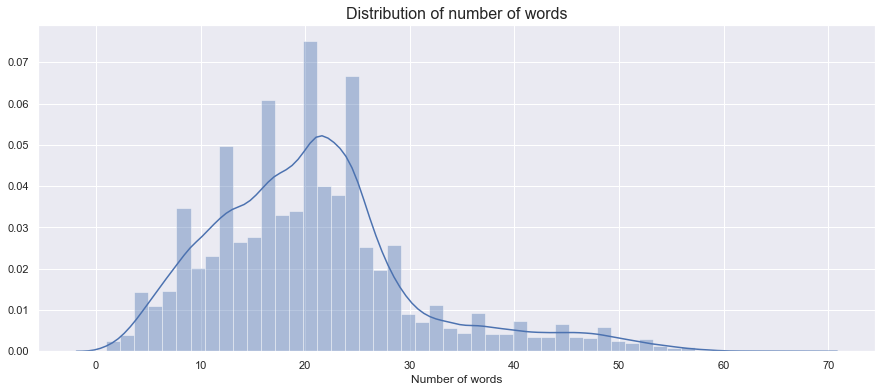

In [56]:
sb.set()
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sb.distplot(documents_information, ax=ax,hist_kws=dict(edgecolor="w", linewidth=1));
plt.savefig('worddistribution.jpg', bbox_inches = "tight")

In [57]:
import nltk
def get_tokens(df):
    cleaned_list["tokens"]=list(map(nltk.word_tokenize, df.cleaned_tweet))

get_tokens(cleaned_list)

In [58]:
from collections import Counter
tokenized_only_dict = Counter(np.concatenate(cleaned_list.tokens.values))

tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
tokenized_only_df.rename(columns={0: 'count'}, inplace=True)

In [59]:
tokenized_only_df.sort_values('count', ascending=False, inplace=True)

## Including Stop 

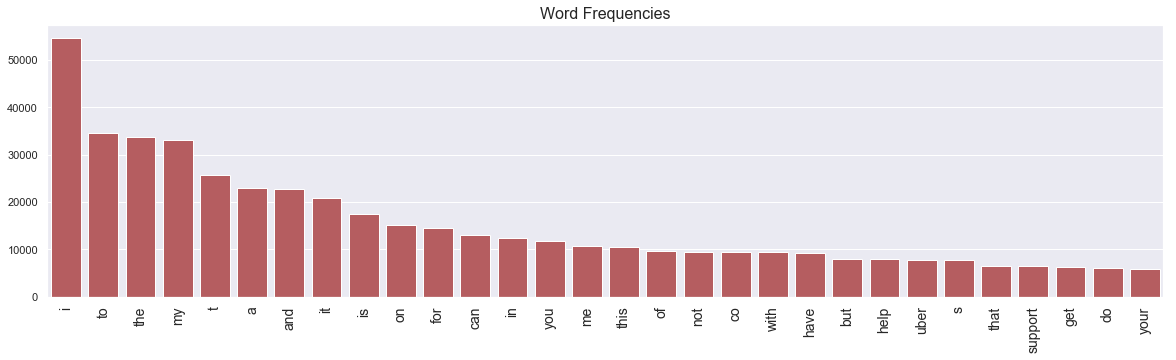

In [60]:
def word_frequency_barplot(df, nr_top_words=30):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sb.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words],color="r", ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax
    
ax = word_frequency_barplot(tokenized_only_df)
ax.set_title("Word Frequencies", fontsize=16);
plt.savefig('frequencyeithstowords.jpg', bbox_inches = "tight")

## Without Stop Words

In [61]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet

stopwords=set(stopwords.words("english"))

In [62]:

def nostopword(tweet):
    tokens=tokenizer.tokenize(tweet)
    tokens=[w for w in tokens if not w in stopwords and len(w)>2]
    
    return tokens

In [63]:
def get_nostopword(data, n=59738):
    data = data.head(n)
    data['nostopword'] = data['cleaned_tweet'].progress_map(nostopword)
    return data
cleaned_list=get_nostopword(cleaned_list)

progress-cleanning: 100%|█████████████████████████████████████████████████████| 59693/59693 [00:04<00:00, 12695.98it/s]


## Stemming and Lemmatizing

In [64]:
from nltk import pos_tag
def stem_words(df):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] =  list(map(lambda sentence:[lemm.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else lemm.lemmatize(i) for i,j in pos_tag(sentence)]
, cleaned_list.nostopword))

    p_stemmer = nltk.stem.porter.PorterStemmer()
    df['stemmed_text'] = list(map(lambda sentence:list(map(p_stemmer.stem, sentence)), cleaned_list.lemmatized_text))

stem_words(cleaned_list)

In [65]:
tokenized_only_dict = Counter(np.concatenate(cleaned_list.lemmatized_text.values))

tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
tokenized_only_df.rename(columns={0: 'count'}, inplace=True)

In [66]:
tokenized_only_df.sort_values('count', ascending=False, inplace=True)

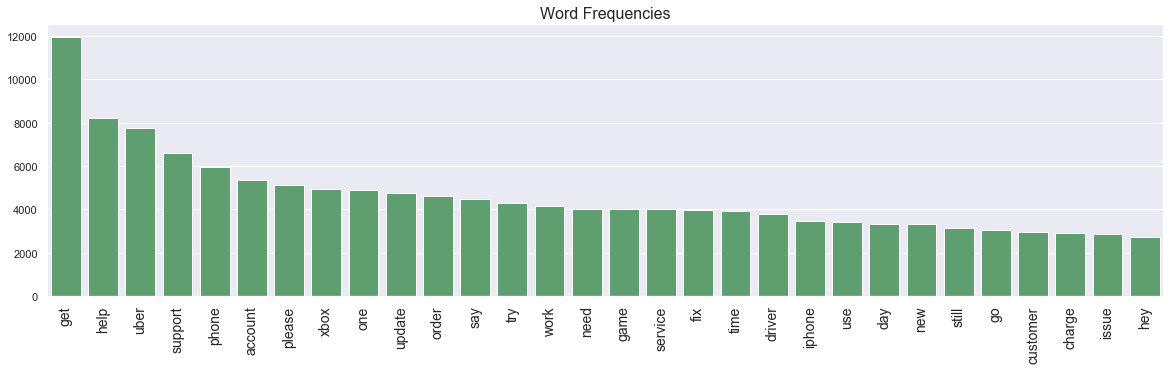

In [67]:
def word_frequency_barplot(df, nr_top_words=30):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sb.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words],color="g", ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax
    
ax = word_frequency_barplot(tokenized_only_df)
ax.set_title("Word Frequencies", fontsize=16);
plt.savefig('frequencynostop.jpg', bbox_inches = "tight")

In [68]:
cleaned_list.columns

Index(['cleaned_tweet', 'category', 'author_id_y', 'tokens', 'nostopword',
       'lemmatized_text', 'stemmed_text'],
      dtype='object')

In [69]:
cleaned_list.shape

(59693, 7)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(np.array(cleaned_list.head(93170).tokens),
                                   np.array(cleaned_list.head(93170).cleaned_tweet), test_size=0.2)


In [71]:
from gensim.models.word2vec import Word2Vec 
LabeledSentence = gensim.models.doc2vec.LabeledSentence 
def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

x_train = labelizeTweets(x_train, 'TRAIN')
x_test = labelizeTweets(x_test, 'TEST')

47754it [00:00, 80459.03it/s] 
11939it [00:00, 254535.54it/s]


In [72]:
#tweet_w2v = Word2Vec(size=150, min_count=20,sg=0)#sg=1: skip-gram, 0: cbow
#tweet_w2v.build_vocab([x.words for x in tqdm(x_train)])
#tweet_w2v.train([x.words for x in tqdm(x_train)], 
#                total_examples=tweet_w2v.corpus_count, epochs=tweet_w2v.iter)

In [73]:
tweet_w2v=Word2Vec.load("word2vec.model")

In [74]:
tweet_w2v.wv.most_similar(["phone"])

[('iphone', 0.6134347915649414),
 ('ios', 0.5708719491958618),
 ('phones', 0.5670835375785828),
 ('wife', 0.564886748790741),
 ('device', 0.5456759929656982),
 ('port', 0.5366654396057129),
 ('bill', 0.5346403121948242),
 ('laptop', 0.5276452898979187),
 ('battery', 0.5213087797164917),
 ('ipad', 0.5206581354141235)]

In [75]:
 #tweet_w2v.save("word2vec.model")
    

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

def plot_words(words):
    word_vecs = [tweet_w2v[word] for word in words]
    pca = PCA(n_components=2)

    columns = ["Component1","Component2"]
    df = pd.DataFrame(pca.fit_transform(word_vecs), columns=columns, index=words)
    def annotate_df(row):  
        ax.annotate(row.name, list(row.values),
                    xytext=(10,-5), 
                    textcoords='offset points',
                    size=12, 
                    color='black')

    ax = df.plot(kind="scatter",x='Component1', y='Component2',figsize=(20,10))
    _ = df.apply(annotate_df, axis=1)
    plt.savefig('outputcb.jpg')

In [77]:
len(tweet_w2v["phone"])

150

In [78]:
words=[]
for wordlist in  cleaned_list.nostopword:
    words.extend(wordlist)

In [79]:
w=[]
for word in words:
    if word in tweet_w2v.wv:
        w.append(word)

In [80]:
print(len(w))

527684


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


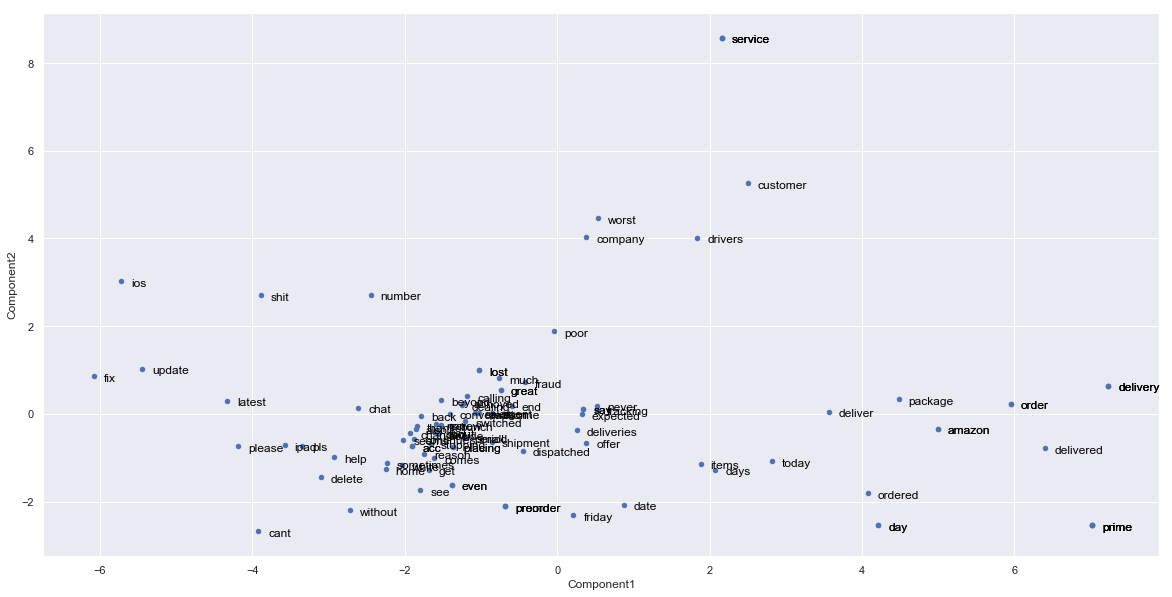

In [81]:
plot_words(w[:100])

In [82]:
print('building tf-idf matrix ...')
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=0)
matrix = vectorizer.fit_transform([x.words for x in x_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print('vocab size :', len(tfidf))

building tf-idf matrix ...
vocab size : 22751


In [83]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += tweet_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [84]:
vectors = np.concatenate([buildWordVector(z, 150) for z in tqdm(map(lambda x: x, cleaned_list.lemmatized_text))])
labels=[label for label in  cleaned_list.author_id_y]
vectors = scale(vectors)

59693it [00:11, 4996.83it/s]


In [85]:
len(vectors)

59693

In [86]:
len(labels)

59693

## Spliting the data into train and test sets

In [87]:
X_train, X_test, y_train, y_test = train_test_split( vectors, labels, test_size=0.33, random_state=42)

In [88]:
from sklearn import preprocessing
encoder = preprocessing.LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [89]:
y_train[0]

array([0, 0, 0, 0, 1, 0])

## Keras 

In [90]:
#from keras.models import Sequential
#from keras.layers import Dense, Activation

In [91]:
#model= Sequential()

In [92]:
#model.add(Dense(512, input_shape=(150,)))
#model.add(Activation('relu'))

In [93]:
#model.add(Dense(6))
#model.add(Activation('softmax'))

In [94]:
#model.compile(loss='categorical_crossentropy', 
#              optimizer='rmsprop', 
#              metrics=['accuracy'])  

In [95]:
#history = model.fit(X_train, y_train, 
#                    batch_size=100, 
#                    epochs=150, 
#                    verbose=1, 
#                    validation_split=0.1)

In [96]:
# summarize history for accuracy
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('Model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('accuracy.jpg',  bbox_inches = "tight")
#plt.show()
# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


## Tuning the model

In [107]:
def create_model(optimizer='adam', activation='relu'):
   # create model
    model = Sequential()
    model.add(Dense(512, input_shape=(150,), activation=activation))
    model.add(Dense(6, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 150]
epochs = [10, 50, 150]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# define the grid search parameters
#weight_constraint = [1, 2, 3, 4, 5]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define the grid search parameters
#neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(optimizer=optimizer, batch_size=batch_size, nb_epoch=epochs, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Making prediction

In [ ]:
#for i in range(10):    
#    prediction = model.predict(np.array([X_test[i]]))

In [ ]:
#i=2000
#text_labels = encoder.classes_ 
#predicted_label = labels[np.argmax(prediction[0])]

#print(cleaned_list.cleaned_tweet.iloc[i], "...")
#print("===========================================================")
#print('Actual label:' + labels[i])
#print("Predicted label: " + predicted_label)